<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/4_09_%5B%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_%EC%97%AD%EC%A0%84%ED%8C%8C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 계층 ( Layer )
* 국소적 계산
  * 내가 관심 있는 연산만 신경 쓰는 것
  * **계층**별로 국소적 계산 일어 난다.
    * 덧셈 계층에서는 덧셈만
    * 곱셈 계층에서는 곱셈만
    * ReLU 활성화 에서는 ReLU만
  * 하나의 계층은 하나의 일만(**국소적**) 전문적으로 할 수 있어야 한다.

# 1. 곱셈 계층 구현하기
입력이 `x, y`일 때
* `forward`(순전파) : `x * y`
* `backward`(역전파) : `dx = 미분값 * y` `dy = 미분값 * x`

In [ ]:
class MulLayer:
    # 생성자 ( 순전파 및 역전파, 필요에 따라 다른 여러 메소드에서 '같이' 사용할 변수를 생성 )
    def __init__(self):
        # 여기서는 변수만 만들어 놓기
        self.x = None
        self.y = None

    # 순전파
    def forward(self, x, y):
        # 역전파 때 서로 반대방향으로 곱해주기 위해 x, y를 저장
        self.x = x
        self.y = y

        # 순전파 연산
        out = x * y
        return out

    # 역전파
    def backward(self, dout):
        # x 방향에 미분값(dout) * y
        # y 방향에 미분값(dout) * x
        dx = dout * self.y
        dy = dout * self.x

        # x가 먼저 들어오고 y가 나중에 들어왔으니 순서 맞춰주기
        return dx, dy

곱셈 레이어 테스트

In [ ]:
# 순전파
apple = 100     # 사과 한개당 가격
apple_cnt = 2   # 사과 개수
tax = 1.1       # 소비세

# 계층은 2개
#   (apple * apple_cnt) * tax

mul_apple_layer = MulLayer() # 사과 전체 가격을 구할 레이어
mul_tax_layer   = MulLayer() # 소비세 까지 적용시킨 가격을 구할 레이어

# 순전파 수행
# 순서 중요
# 계획한 순서 그대로 레이어를 배치해서 연산해야함
# 결과물은 제대로 나오지만 역전파 할 때 문제가 된다

# 순전파 때 A-B-C 순으로 했으면
# 역전파 때는 C-B-A 순으로 하기

# 사과 전체 가격
apple_price = mul_apple_layer.forward(apple, apple_cnt)

# 소비세 적용 가격
price = mul_tax_layer.forward(apple_price, tax)

print(f'최종 사과의 가격 : {round(price)}')

최종 사과의 가격 : 220


In [ ]:
# 역전파 수행하기
#   제일 마지막 값에 대한 미분값을 생각하기
#   Δ돈통 / Δ포스기 = 1

dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print(f'사과 전체 가격에 대한 미분값 - d돈통 / d사과전체가격 : {dapple_price}')
print(f'사과 1개 가격에 대한 미분값 - d사과전체가격 / d사과1개가격 : {dapple}')
print(f'사과 개수에 대한 미분값 - d돈통 / d사과개수 : {dapple_cnt}')
print(f'소비세에 대한 미분값 - d돈통 / d소비세 : {dtax}')

사과 전체 가격에 대한 미분값 - d돈통 / d사과전체가격 : 1.1
사과 1개 가격에 대한 미분값 - d사과전체가격 / d사과1개가격 : 2.2
사과 개수에 대한 미분값 - d돈통 / d사과개수 : 110.00000000000001
소비세에 대한 미분값 - d돈통 / d소비세 : 200


# 2. 덧셈 계층 구현하기
* `forward` : `x + y`
* `backward` : 뒷층에서 보낸 미분값에 `* 1`만 하면 된다. `dx = dout * 1, dy = dout*1`

In [ ]:
class AddLayer:
    # 생성자 ( 순전파 및 역전파, 필요에 따라 다른 여러 메소드에서 '같이' 사용할 변수를 생성 )
    def __init__(self):
        # 할게 없다
        pass

    # 순전파
    def forward(self, x, y):
        # 순전파 연산
        out = x + y
        return out

    # 역전파
    def backward(self, dout):
        # x 방향에 미분값(dout) * 1
        # y 방향에 미분값(dout) * 1
        dx = dout * 1
        dy = dout * 1

        # x가 먼저 들어오고 y가 나중에 들어왔으니 순서 맞춰주기
        return dx, dy

In [ ]:
apple = 100 # 사과 가격
apple_cnt = 2 # 사과 갯수

orange = 150
orange_cnt = 3

tax = 1.1

In [ ]:
# 1 계층 - 사과와 오렌지 각각의 국소적 계산
# ( 사과 1개 가격 * 사과 개수) (오렌지 1개 가격 * 오렌지 개수)
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()

# 2 계층 - 사과 전체 가격 + 오렌지 전체 가격
add_apple_orange_layer = AddLayer()

# 3 계층 - 소비세 적용
mul_tax_layer = MulLayer()

In [ ]:
# 순전파 계산
# 1 계층 계산
# 사과에 대한 국소적 계산
apple_price = mul_apple_layer.forward(apple, apple_cnt)

# 오렌지에 대한 국소적 계산
orange_price = mul_orange_layer.forward(orange, orange_cnt)

# 2계층 계산
total_price = add_apple_orange_layer.forward(apple_price,orange_price)

# 3계층 계산
price = mul_tax_layer.forward(total_price, tax)

In [ ]:
print(f'전체가격 : {price}')

전체가격 : 715.0000000000001


In [ ]:
# 역전파
dprice = 1 # d돈통 / d포스기

# dprice / dtotal_price, dprice / dtax
# d돈통 / d포스기 * d포스기 / d전체가격, d돈통 / d포스기 * d포스기 / d소비세
dtotal_price, dtax = mul_tax_layer.backward(dprice)

# d돈통 / dapple_price, d돈통 / dorange_price
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)

# 사과와 오렌지에 대한 각각의 미분값 (국소적 미분)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)
dorange, dorange_cnt = mul_orange_layer.backward(dorange_price)

In [ ]:
print("사과 2개, 오렌지 3개의 가격 (소비세 적용) : {}".format(price))
print('전체 가격에 대한 미분 : {}'.format(dtotal_price))

print("사과 전체 가격 미분 : {}".format(dapple_price))
print("사과 개수 미분 : {}".format(dapple_cnt))
print("사과 가격 미분 : {}".format(dapple))

print("오렌지 전체 가격 미분 : {}".format(dorange_price))
print("오렌지 개수 미분 : {}".format(dorange_cnt))
print("오렌지 가격 미분 : {}".format(dorange))

print("소비세 미분 : {}".format(dtax))

사과 2개, 오렌지 3개의 가격 (소비세 적용) : 715.0000000000001
전체 가격에 대한 미분 : 1.1
사과 전체 가격 미분 : 1.1
사과 개수 미분 : 110.00000000000001
사과 가격 미분 : 2.2
오렌지 전체 가격 미분 : 1.1
오렌지 개수 미분 : 165.0
오렌지 가격 미분 : 3.3000000000000003
소비세 미분 : 650


# 신경망 레이어 구현

## ReLU 레이어

relu의 순전파 수식
$$
y = \begin{cases} 
x\quad( x > 0 )
\\ 0\quad( x \leq 0 )
\end{cases}
$$

relu의 역전파 수식

$$
\frac{\partial y}{\partial x} = \begin{cases} 
1\quad( x > 0 )
\\ 0\quad( x \leq 0 )
\end{cases}
$$

* `forward` : 입력값이 0보다 작으면 0으로, 0보다 크면 입력값을 그대로 출력
* `backward` : `forward`시에 0보다 작았으면 해당 위치의 값을 0으로 설정, 0보다 컸으면 변화율이 1이기 때문에 미분값을 그대로 유지
* 비고 : 어떤 인덱스의 값이 음수였는지는 지를 저장. (인덱스 x), `mask`로 저장



In [ ]:
class ReLU:
  def __init__(self):
    # 순전파 때 어느 부분이 음수였고, 양수 였는지를 판단하는 mask를 만들고,
    # 역전파 때 이 mask를 이용해서 음수였던 부분의 기울기(미분값)를 0으로 만든다.
    self.mask = None
  
  def forward(self, x):
    self.mask = (x <= 0) # 음수면 True, 양수면 False

    out = x.copy() # 원본 배열 복사
    out[self.mask] = 0 # 음수였던 부분을 0으로 만든다.

    return out

  def backward(self, dout):
    # 순전파 때 음수였던 부분을 0으로 만들었다.
    #  음수였었던 부분을 기억하고 있다가.(self.mask) 미분값 전달 할 때 해당 인덱스를 0으로 만들어 주면 된다.
    dout[self.mask] = 0
    dx = dout

    return dx

In [ ]:
import numpy as np

x = np.array([[1.0, -0.5],
              [-2.0, 3.0]])

relu = ReLU()
relu.forward(x) # 음수 였던 부분이 전부 0이 된다.

array([[1., 0.],
       [0., 3.]])

In [ ]:
relu.mask

array([[False,  True],
       [ True, False]])

In [ ]:
dout = np.array([[-0.1, 3.0],
                 [1.3, -1.1]]) # 양수였던 부분들의 미분값이 음수, 음수였던 부분들의 미분값이 양수

relu.backward(dout)

array([[-0.1,  0. ],
       [ 0. , -1.1]])

## $\sigma$(시그모이드) 함수 구현
* 순전파

  * $
\sigma(x) = \frac{1}{1+e^{-x}}
$

  * $
y = \sigma(x)
$
---
* 역전파

  * $
y^{\prime} = \sigma (x)(1-\sigma(x))
$

  * $y^{\prime} = y(1-y)
$

* 시그모이드 레이어에서 순전파 때 기억하고 있어야 할 값 : $y$



In [ ]:
class Sigmoid:

    def __init__(self):
        # y 를 out이라고 정의
        self.out = None

    def forward(sefl, x):
        out = 1 / (1 + np.exp(-x)) # 시그모이드 계산
        self.out = out # 역전파 때 사용하기 위함
    
    def backward(self,dout):
        dx = dout * self.out * (1 - self.out) # 미분값 * y (1-y)

## Affine 계층
* `forward`
  * 입력값 `x`와 가중치 `W`의 내적 + `b`( `XW + b` )
  * **평탄화**
    * 이미지가 들어 올 수도 있고( 2차원 이상의 배열 ), 일반적인 행렬이 들어올 수도 있다.
    * XW+b형식의 내적을 하기 위해서는 어떠한 데이터든 평탄화가 필요할 것
      * 평탄화가 진행 됐다는 이야기는 원래 데이터의 형상을 사용하지 않겠다는 뜻이 된다. - 원본 데이터의 형상이 무시됨
  * 원본 데이터의 모양을 **저장**
  * N차원 배열 형태로 입력이 되었으면 N차원 배열 형태로 미분값을 전달 해야 한다.
    * 원본 입력 배열의 형상을 유지
* `backward`
  1. 미분값(`dout`)과 가중치의 전치행렬(`W.T`)의 내적 ( 입력값에 대한 미분값 )
$ \frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot W^{T} $
  2. 입력값의 전치행렬(`X.T`)과 미분값(`dout`)의 내적 ( 가중치에 대한 미분값 ) $ \frac{\partial L}  {\partial W} = X^{T}\cdot\frac{\partial L}{\partial Y} $
  3. 편향은 배치를 축으로 해서 합을 구한다. (`axis = 0`)
  4. 입력값의 형상으로 미분값(`dx`)의 형상을 바꿔준다.
    * 예를 들어 N차원 입력을 받았으면, 미분값도 N차원 입력 배열의 형상이 되어야 한다.

**저장해야 할 값**
  1. 원본 `x`의 형상(shape) - 역전파 할 때 미분 값의 형상을 원본 입력 배열의 형상으로 재구성 할 것
  2. 원본 `x`의 데이터 - W의 기울기를 구하기 위해 필요함(x.T을 사용하기 위함)
  3. 가중치, 편향 (W, b)
  4. `dW, db` : 가중치와 편향의 미분값
    * 나중에 경사하강법 때 사용해야 하기 때문


In [ ]:
class Affine:

    # Affine 계충을 초기화 할 때는 이미 만들어진 가중치와 편향을 받아올 것
    def __init__(self, W,b):
        # 1. 가중치, 편향, 입력값 x도 정의만

        # 전체적으로 사용할 변수들을 `정의`만
        self.W = W
        self.b = b

        self.x = None
        
        # 2. x의 형상
        # x에 대한 역전파를 수행할 때 모양(shape)이 바뀌어 버린x의 미분값의 형상을 원래대로 돌려놓기 위해 x의 형상을 저장할 예정
        # 순전파 떄 (N, 28, 28, 1) -> 평탄화 -> (N,784)
        # 역전파 때 (N, 784) -> 원본 모양으로 복구 -> (N, 28, 28, 1)의 모양으로 미분값 행렬을 구할 수 있다.
        self.original_x_shape = None

        # 3. W와 b의 기울기 배열
        #  최적화(Optimization)을 위해 각 매개변수의 미분값을 가지고 있어야 한다.
        #  추후에 경사하강법 등을 구현하기 위해서 사용
        #  dW, db를 사용해서 W와 b를 갱신(update)하는 것을 <<학습>>이라고 한다.
        self.dW = None
        self.db = None

    def forward(self,x):
        # 텐서 대응을 위해 입력값 x의 형상을 저장
        # ex) -> (3,2,2) - 3개의 데이터가 (2,2) 모양으로 들어있는 형태 / 평탄화 -> (3,4) -> 역전파 할 때는 (3,2,2)
        self.original_x_shape = x.shape

        # 평탄화 진행
        DATA_SIZE = x.shape[0]

        x = x.reshape(DATA_SIZE, -1) # 평탄화

        self.x = x # 역전파 때 가중치에 곱하기 위해서 저장(x,T)

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):

        # 입력값 x의 미분값
        dx = np.dot(dout, self.W.T) # 미분값 * W의 전치행렬

        # 가중치 W의 미분값
        self.dW = np.dot(self.x.T, dout) # x의 전치행렬 * 미분값

        # 편향 b의 미분값 ( 배치의 방향(N 방향 - axis=0) 으로 더해준다. )
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape) # (12, 3) -> *(12, 3) -> 12, 3 으로 언패킹 된다.
        
        return dx

softmax, loss를 구하기 위한 각종 함수

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 수치미분 함수
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

## SoftmaxWithLoss 계층( 출력층 )
* `softmax`에 의한 분류 및 `CEE`를 활용한 손실함수를 동시에 구현
* `forward`
  * softmax 적용 및 loss 구하기
    * 정답 레이블(`t`)
    * 예측값 ( 소프트맥스 결과물 )
    * loss값 ( 기록용 )
* `backward`
  * 순수한 오차(`y-t`)를 구해서 이전층에 전달
  * 주의사항 : `t`가 OHE이 되어 있는지, 안되어 있는지에 따라서 코드가 달라진다.

In [ ]:
class SoftmaxWithLoss:

    def __init__(self):
        self.loss = None
        self.y    = None # 소프트맥스 결과물 예측값 저장( 역전파 때 사용 )
        self.t    = None # 정답 레이블 ( 역전파 때 사용 )

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1): # dout이 1인 이유 : d돈통 / d포스기
        # 배치 고려하기 ( 미분값 평균을 구하기 위해 )
        batch_size = self.t.shape[0]

        # t가 원-핫 인코딩이 되어있는지, 안되어있는지 고려
        # 원소의 개수를 비교

        #t가 원-핫 인코딩이 되어 있는 경우
        # ex) t = [0, 1, 0, 0], y = [0.1, 0.7, 0.1, 0.1]
        #     t.size = 4, y.size = 4

        #t가 원-핫 인코딩이 안 되어 있는 경우
        # ex) t = [2], y = [0.1, 0.7, 0.1, 0.1]
        #     t.size = 1, y.size = 4
        if self.t.size == self.y.size: # 출력층의 원소 개수를 비교하는 것은 원-핫 인코딩이 되어있는 t
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()

            # 원-핫 인코딩이 되어있지 않는 t는 정답 레이블의 인덱스로 생각할 수 있다.
            # y = [[0.2, 0.1, 0.7]], t = 2
            # dx[np.arange(batch_size), self.t] -> dx[0, 2] -> 0.7 -> 0.7-1 로 오차를 구함
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


# 신경망 레이어를 이용해서 MNIST 분류 네트워크를 구축

In [ ]:
from collections import OrderedDict # 추가 순서가 유지되는 dict

* 일반 `dict`는 데이터 추가 순서 유지 x
* OrderedDict는 데이터 추가 순서 유지 o

In [ ]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 매개변수 초기화(가중치, 편향)
        self.params = {}

        # 1층 은닉층을 위한 매개변수
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        # 2층 출력층을 위한 매개변수
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 레이어 배치
        self.layers = OrderedDict() # 레이어 추가의 순서가 유지되어야 하기 때문에 OrderedDict 생성

        # Affine 1층 + 활성화 계층(Relu)
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['ReLu'] = ReLU()

        # Affine 2층 + SoftmaxWithLoss(출력층)
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        # 항상 마지막 층은 SoftmaxWithLoss가 되어야 한다.
        self.lastLayer = SoftmaxWithLoss()

    def predict(self,x):
        # 순전파
        # self.layers에 들어있는 레이어들을 순서대로 꺼내서 forward 해주면 된다.
        for layer in self.layers.values():
            x = layer.forward(x)

        return x
    
    def loss(self, x, t):
        # predict를 하고, predict에 대한 loss를 구하면 된다.

        y = self.predict(x)
        return self.lastLayer.forward(y, t)# softmax와 loss를 동시에 구했다!

    def accuracy(self, x, t):
        # 예측을 하고, 정답이랑 얼마나 틀렸는지를 계산
        # 단, t가 원-핫 인코딩이 되어있는지, 안되어있는지가 중요!
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 제일 큰 값 하나만 뽑자.( 제일 확률이 높은 곳에 위치한 인덱스를 갖는다. )

        # 원-핫 인코딩 처리
        # t.ndim != 1 --> t가 원핫 인코딩이 되어있는 상태라면
        # t에서 제일 높은 인덱스를 찾겠다.
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy  

    # 역전파를 이용해서 기울기 구하기
    def gradient(self, x, t):
        # 역전파를 하기 위해 필요한 것
        # 1. 오차를 먼저 구해야 한다.
        # 오차를 구하려면? 예측(predict)를 통해서 loss를 계산 해야 오차를 구할 수 있다.

        self.loss(x,t) # 오차 발생

        # 역전파
        dout = 1 # dLoss / dLoss (d돈통 / d포스기)

        # SoftmaxWithLoss의 미분값 구하기
        
        dout = self.lastLayer.backward(dout) # 순수한 오차가 나온다

        # 순전파 때 활용한 레이어 다 가지고 와서 거꾸로 역전파 하기
        layers = list(self.layers.values()) #  레이어를 모두 가지고 와서
        layers.reverse() # 순서를 거꾸로 뒤집어 준다.

        for layer in layers:

            # 미분값을 집어 넣어가면서 역전파!
            dout = layer.backward(dout)
        
        # 구해진 미분값(기울기) 가중치, 편향의 미분값
        grads = {}

        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    # 구식 방법. 수치미분을 활용해서 기울기 구하기( 사용하지 않습니다. 왜? 느리니까..)
    def numerical_gradient_params(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
            
        return grads


수치 미분과 오차역전파를 했을 때의 기울기 비교

In [ ]:
from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder

mnist = datasets.mnist

(X_train, t_train), (X_test, t_test) = mnist.load_data()

# t_train에 대한 OHE (여기서는 필요 없다)
t_train_dummy = OneHotEncoder().fit_transform(t_train.reshape(-1,1)).toarray()
t_test_dummy = OneHotEncoder().fit_transform(t_test.reshape(-1,1)).toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
network = TwoLayerNet(input_size = 28 * 28, hidden_size = 50, output_size = 10)

X_batch = X_train[:3]
t_batch = t_train[:3]

# 수치 미분을 활용한 기울기 배열

grads_numerical = network.numerical_gradient_params(X_batch, t_batch)

# 오차 역전파를 이용한 기울기 배열
grads_backprop = network.gradient(X_batch, t_batch)

keys = ['W1', 'b1', 'W2', 'b2']
for key in keys:
    diff = np.average(np.abs(grads_backprop[key] - grads_numerical[key])) # 각각의 매개변수 별로 기울기의 절대값의 평균
    print(f'key: {key} / Diff : {diff}')

key: W1 / Diff : 3.8009959332780736e-10
key: b1 / Diff : 2.1525495392783974e-09
key: W2 / Diff : 6.2995674339205176e-09
key: b2 / Diff : 1.3975686413286726e-07


오차 역전파로 기울기를 구했을 때랑, 수치미분으로 기울기를 구했을 때랑 차이가 거의 없다는 것을 알 수 있다.

MNIST 최종 테스트 하기

In [ ]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

# 하이퍼 파라미터 설정
iter_num = 10000 # 학습 반복 횟수
learning_rate = 0.1 # 학습률
batch_size = 100 # 배치 사이즈
train_size = X_train.shape[0] # 훈련할 이미지의 개수

# 훈련 과정을 1 에폭마다 기록( 시각화 )
train_loss_list = []
train_acc_list = []

test_loss_list = []
test_acc_list = []

# 에폭 횟수 구하기
#  BATCH를 이용해서 전체 데이터를 모두 사용하면 1에폭
#   100개의 배치를 이용해서 600번의 훈련을 반복하면 총 60000개(전체 데이터의 개수)의 데이터로 훈련 하는 것
#   이 때가 1 에폭

iter_per_epoch = int(max(train_size / batch_size, 1)) # max를 한 이유 : 종종 train_size < batch_size 일 때는 한번만 학습

for i in range(iter_num):
  # 미니 배치 생성
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 훈련 1 단계 - 기울기 계산
  grads = network.gradient(X_batch, t_batch) # 역전파를 이용해 기울기를 계산

  # 훈련 2 단계 - 경사하강법 수행(최적화 - Optimization)
  for key in["W1", "b1", "W2", "b2"]:
    # network의 params에는 실제 가중치, 편향 - 얘들을 갱신
    # grads에는 dL/W1, dL/W2, dL/b1, dL/b2

    network.params[key] -= learning_rate * grads[key] # 매개변수 갱신
  
  # 1에폭 마다 정확도, loss 확인
  if i % iter_per_epoch == 0:  # 600번 돌 때마다 기록( 1에폭 마다 기록 )
    train_loss = network.loss(X_batch, t_batch)
    train_acc = network.accuracy(X_train, t_train)

    test_loss = network.loss(X_test, t_test)
    test_acc  = network.accuracy(X_test, t_test)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print("Train Accuracy : {:.6f} / Test Accuracy : {:.6f} / Train Loss : {:.6f} / Test Loss : {:.6f}".format(train_acc, test_acc, train_loss, test_loss))

Train Accuracy : 0.137583 / Test Accuracy : 0.132000 / Train Loss : 2.300763 / Test Loss : 2.301617
Train Accuracy : 0.906017 / Test Accuracy : 0.911000 / Train Loss : 0.252737 / Test Loss : 0.316519
Train Accuracy : 0.924283 / Test Accuracy : 0.926600 / Train Loss : 0.134813 / Test Loss : 0.256342
Train Accuracy : 0.937500 / Test Accuracy : 0.936900 / Train Loss : 0.158151 / Test Loss : 0.216291
Train Accuracy : 0.945917 / Test Accuracy : 0.945700 / Train Loss : 0.193566 / Test Loss : 0.191408
Train Accuracy : 0.948867 / Test Accuracy : 0.946900 / Train Loss : 0.069993 / Test Loss : 0.179771
Train Accuracy : 0.956683 / Test Accuracy : 0.953200 / Train Loss : 0.053541 / Test Loss : 0.160669
Train Accuracy : 0.960967 / Test Accuracy : 0.957500 / Train Loss : 0.106062 / Test Loss : 0.146151
Train Accuracy : 0.964367 / Test Accuracy : 0.962400 / Train Loss : 0.116488 / Test Loss : 0.135771
Train Accuracy : 0.966917 / Test Accuracy : 0.962100 / Train Loss : 0.085356 / Test Loss : 0.131629


In [ ]:
import matplotlib .pyplot as plt
%matplotlib inline

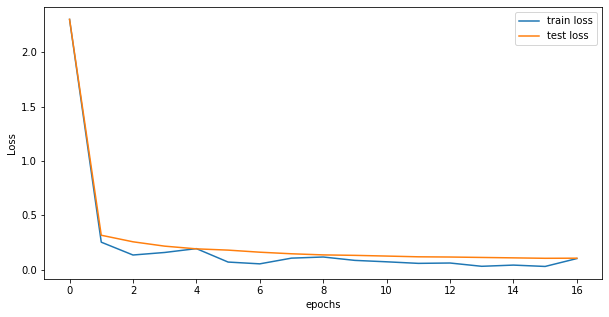

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="train loss")
plt.plot(np.arange(len(test_loss_list)), test_loss_list, label="test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

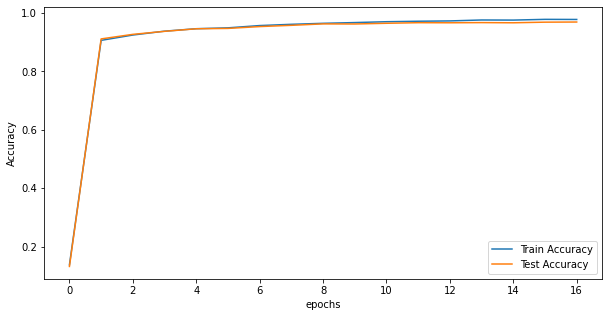

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 딥러닝을 공부하기 위한 준비
1. 수학 - 선형 대수 공부
    * 분류, 회귀 모델을 잘 이해하기 위함
2. 수학 - 확률, 통계
    * 생성 모델
3. 파이썬만을 이용한 네트워크 구축 (간단하게 참고만)
    * 코딩 못해도 좋음!
    * 신경망 이라는 것이 어떻게 작동하는지는 파악하는 것이 좋다.